In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv("C:\\Users\\Prabin\\clean_data.csv")

In [3]:
data.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591


In [4]:
data.columns

Index(['year', 'month', 'stateDescription', 'sectorName', 'customers', 'price',
       'revenue', 'sales'],
      dtype='object')

In [5]:
data.stateDescription.unique()

array(['Wyoming', 'New England', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Alabama', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Middle Atlantic', 'Pacific Contiguous',
       'Pacific Noncontiguous', 'U.S. Total', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Rhode Island', 'Alaska', 'Arizona', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'East North Central',
       'West North Central', 'South Atlantic', 'East South Central',
       'West South Central', 'Mountain', 'Pennsylvania'], dtype=object)

In [17]:
sub_data = data[(data['stateDescription'] == 'Ohio') | (data['year'] == 2020)]
sub_data.groupby('sectorName')['revenue'].mean()

sectorName
all sectors       1464.106267
commercial         498.937985
industrial         262.319356
other               19.077668
residential        700.404384
transportation       2.039270
Name: revenue, dtype: float64

In [18]:
sub_data = data[(data['stateDescription'] == 'Ohio') | (data['year'] == 2020)]
sub_data.groupby('sectorName')['price'].sum()

sectorName
all sectors       10849.76
commercial        10889.38
industrial         7574.52
other               135.60
residential       13429.46
transportation     6374.33
Name: price, dtype: float64

In [20]:
data.loc[:, 'customers']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
85865    1717720.0
85866     208669.0
85867      34951.0
85868    1474098.0
85869          2.0
Name: customers, Length: 85870, dtype: float64

#### Data cleaning or manipulation

In [22]:
data.duplicated().sum()

0

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  object 
 3   sectorName        85870 non-null  object 
 4   customers         59830 non-null  float64
 5   price             85870 non-null  float64
 6   revenue           85870 non-null  float64
 7   sales             85870 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.2+ MB


In [25]:
data.isna().sum()

year                    0
month                   0
stateDescription        0
sectorName              0
customers           26040
price                   0
revenue                 0
sales                   0
dtype: int64

**Handling Duplicates**

data.isna()
data.fillna(value)
data handling 
1. trimming (cutting out the outliers from the data)
2. capping (bringing all outliers to the max value)

<Axes: ylabel='Frequency'>

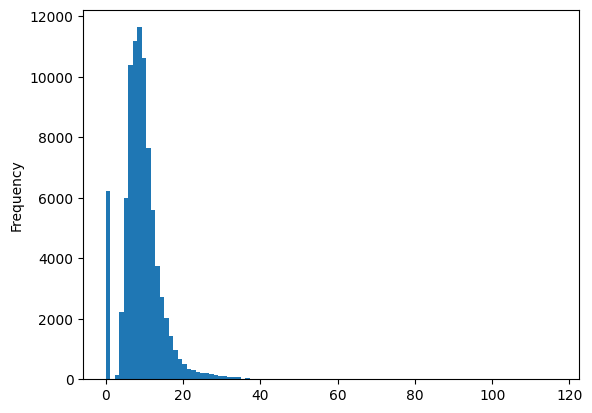

In [36]:
data['price'].plot.hist(bins=100)

<Axes: >

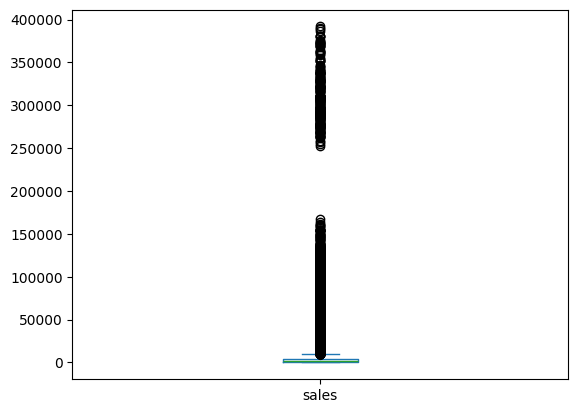

In [37]:
data['sales'].plot.box()

<Axes: >

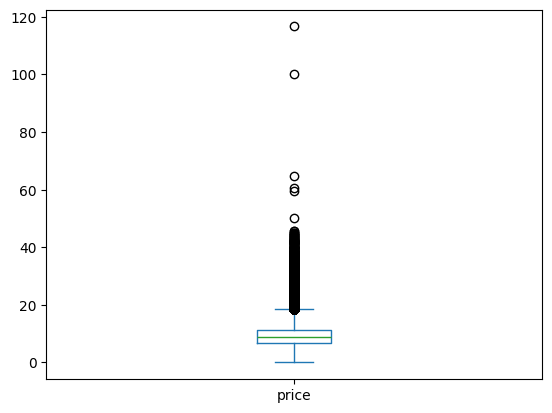

In [38]:
data['price'].plot.box()

In [42]:
z_score = stats.zscore(data['price'])
filter_mask = abs(z_score < 5)
data[filter_mask]

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591
...,...,...,...,...,...,...,...,...
85865,2024,1,Arkansas,all sectors,1717720.0,9.63,442.98773,4598.63147
85866,2024,1,Arkansas,commercial,208669.0,10.26,97.79467,953.02154
85867,2024,1,Arkansas,industrial,34951.0,7.08,109.92656,1553.02838
85868,2024,1,Arkansas,residential,1474098.0,11.24,235.26399,2092.56172


#### Writing in pandas

```python
data.to_csv(
    'new_file.csv',
    index=False
```